## **Data Analysis Project: Cinematic Business**  
**Quy trình:**  
- Giai đoạn 1: Làm sạch và khám phá dữ liệu
    + Customer data
        * address, industry: xử lý dữ liệu thiếu
        * customerid: xóa các kí tự đặc biệt
        * DOB: Chuyển về ngày tháng năm sinh
        * age: tạo thêm cột age tính tuổi của khách hàng
    + Ticket data
        * showtime: Tạo cột showtime từ 2 cột date và time
        * total,popcorn,saledate,orderid: xử lý dữ liệu thiếu
        * customerid: Xóa các kí tự đặc biệt
        * date,hour,dayinweek,weekinyear: tạo thêm các cột mới về thời gian phục vụ cho việc phân tích
    + Film data
        * listed_in, country: chuyển đổi cột chứa multi-value thành dummy value
        * duration: loại bỏ "min" và chuyển dữ liệu thành dạng int 
    + Khám phá dữ liệu
        * Báo cáo dữ liệu có dấu hiệu bất thường
        * Phân tích tương quan
- Giai đoạn 2: Nạp dữ liệu
    + Tạo server, database trên Azure:
        * Sử dụng pyodbc để connect db trên azure
        * Thiết kế database: Cấu hình các trường dữ liệu, tạo ràng buộc(FK) giữa các bảng.
        * Đẩy dữ liệu lên database
- Giai đoạn 3: Phân tích dữ liệu
    + Phân tích doanh thu
        * Phân tích doanh thu theo thời gian
        * Phân tích doanh thu theo phim
        * Phân tích doanh thu theo khách hàng
    + Phân tích khách hàng
        * Phân tích chân dung khách hàng
        * Phân cụm khách hàng

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import random
import string
from datetime import datetime, timedelta, date
import warnings
warnings.filterwarnings('ignore')

## **Giai đoạn 1: Làm sạch dữ liệu**

### **Customer data**

In [65]:
data_url = 'https://github.com/anhvi02/ProjectCinema/raw/main/Data/DATA_SET_-_VONG_1_CUOC_THI_DATA_GOT_TALENT_2023.xlsx'
df_cust = pd.read_excel(data_url, sheet_name='customer')
df_cust.head(3)

,customerid,DOB,gender,address,Website,job,industry
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics


**Khám phá dữ liệu**

In [66]:
def explore_data(dataframe):
    print('Data Shape: \n ', dataframe.shape, end=' \n \n ')
    print('Data Types: \n ', dataframe.dtypes, end=' \n \n ')
    # print('Data information: \n ',dataframe.info(), end=' \n \n ')
    print('Data total missing values: \n ', dataframe.isnull().sum(), end=' \n \n ')
    print('Data total duplicated values: \n ',dataframe.duplicated().sum(), end=' \n \n ')

# explore_data(df_cust)

**Xử lí dữ liệu thiếu:**
- address: fill giá trị 'Unknown'  
- industry: fill giá trị 'Unknown'
- Website: fill giá trị 'Unknown'

In [67]:
# Cột 'address': thay bằng 'unknown'
df_cust['address'] = df_cust['address'].fillna('Unknown')
# Cột 'industry': thay bằng 'Unknown'
df_cust['industry'] = df_cust['industry'].fillna('Unknown')
# cột 'website' thay bằng 'Unknown'
df_cust['Website'] = df_cust['Website'].fillna('Unemployed')
df_cust

,customerid,DOB,gender,address,Website,job,industry
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
...,...,...,...,...,...,...,...
4474,KH9855766,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",Unemployed,specialist,finance
4475,KH9958204,36892,Nữ,"Phước Mỹ, ĐN",Unemployed,teenager,Unknown
4476,WEBS00000043900,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction
4477,WEBS00000044909,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance


**Xử lý customerid**  
- Xóa các kí tự đặc biệt

In [68]:
def remove_special_char(document):
  special_characters=['!','@','#','$','%','^','*','&','.',',','/']
  normal_string=document
  for i in special_characters:
  # Replace the special character with an empty string
      normal_string=normal_string.replace(i,"")
  return normal_string

df_cust['customerid'] = df_cust['customerid'].apply(remove_special_char)
df_cust.head(10)

,customerid,DOB,gender,address,Website,job,industry
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
5,0000000109,36285,Nam,Tam Thuan,KH0104|0191,student,education
6,0000000221,33985,Nam,"Cẩm Lê,Đn",KH0104|2742,blue collar,construction
7,0000000228,35012,Nam,"Ngũ Hành Sơn, ĐN",Unemployed,specialist,health service
8,0000000229,33617,Nam,"Lê Đình Dương, ĐN",KH0104|2716,white collar,economics
9,0000000266,34700,Nam,Le Duan,KH0104|0044,blue collar,social service


**Xử lí cột 'DOB':**
- Chọn mốc thời gian là 01/01/1900
- Chuyển đổi những con số trong cột 'DOB' thành ngày cụ thể bằng timedelta

In [69]:
def convert_dob(data):
    data = int(data)
    
    # Chọn mốc thời gian (1 tháng 1 năm 1900)
    moc_tg = date(1900, 1, 1)

    # Chuyển đổi tổng số ngày thành ngày tháng năm cụ thể
    decoded_date = moc_tg + timedelta(days=data)

    return decoded_date

# Chuyển đổi giá trị số ngày thành ngày tháng và gán lại vào cột 'DOB'.
df_cust['DOB'] = df_cust['DOB'].apply(convert_dob)

**Tính tuổi của customer và xử lý bất thường ở cột tuổi**

In [70]:
# tìm khách hàng có năm sinh bất thường
def extract_year(data):
    return data.year
    
df_cust['year'] = df_cust['DOB'].apply(extract_year)
obnormal_year = df_cust[(df_cust['year']>2024)  | (df_cust['year']<1900)]
mode_year = df_cust['year'].mode()
#replace năm sinh bất thường thành mode year
for ind in obnormal_year.index:
    df_cust.iloc[ind, 1] = df_cust.iloc[ind, 1].replace(year=mode_year[0])
df_cust = df_cust.drop(columns='year')
# tính thêm cột tuổi của khách hàng
df_final_cust = df_cust.copy()

def extract_age(birthday):
    today = datetime.now().year
    age = today - birthday.year
    return age
df_final_cust['age'] = df_final_cust['DOB'].apply(extract_age)
df_final_cust.head(3)

,customerid,DOB,gender,address,Website,job,industry,age
0,0000000014,1999-04-20,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,25
1,0000000034,1998-04-18,Nam,man thai,KH0104|0333,student,health service,26
2,0000000051,1993-12-18,Nam,que son quang nam,KH0104|0255,blue collar,economics,31


### **Ticket data**

In [71]:
data_url = 'https://github.com/anhvi02/ProjectCinema/raw/main/Data/DATA_SET_-_VONG_1_CUOC_THI_DATA_GOT_TALENT_2023.xlsx'
df_tick = pd.read_excel(data_url, sheet_name='ticket')
df_tick.head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket type,ticket price,popcorn
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074925,2019-05-06,18:15:00,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074924,2019-05-06,18:15:00,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097042,2019-05-22,20:45:00,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
3,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097041,2019-05-22,20:45:00,E03,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000.0,0000000034,20106761,2019-05-30,19:30:00,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không


In [72]:
explore_data(df_tick)

Data Shape: 
  (35474, 15) 
 
 Data Types: 
  orderid                 object
cashier                 object
saledate        datetime64[ns]
total                  float64
customerid              object
ticketcode               int64
date            datetime64[ns]
time                    object
slot                    object
room                     int64
film                    object
slot type               object
ticket type             object
ticket price             int64
popcorn                 object
dtype: object 
 
 Data total missing values: 
  orderid         96
cashier          0
saledate        96
total           96
customerid       0
ticketcode       0
date             0
time             0
slot             0
room             0
film             0
slot type        0
ticket type      0
ticket price     0
popcorn         96
dtype: int64 
 
 Data total duplicated values: 
  0 
 
 

**Gộp 2 cột date, time thành 1 cột**

In [73]:
# chuyển cột time thành dạng showtime
df_tick['time'] = pd.to_datetime(df_tick['time'], format='%H:%M:%S')
# trích xuất time dạng HH:MM:SS thành str
df_tick['time'] = df_tick['time'].dt.strftime('%H:%M:%S')
# Chuyển cột date thành str để + với time
df_tick['date']=df_tick['date'].astype(str)
df_tick['showtime'] = pd.to_datetime(df_tick['date'] + ' ' + df_tick['time'])
# drop cột date và time
df_tick.drop(columns=['date','time'],inplace = True)

**Xử lý dữ liệu null**

In [74]:
# Xử lý null cột total
df_total_null = df_tick[df_tick['total'].isnull()]
df_total_price = df_total_null.groupby(['customerid', 'showtime']).agg(total_ticket_price=('ticket price', 'sum')).reset_index()
# result_df = grouped_df.size().reset_index(name='count')
# result_df
merged_df = pd.merge(df_total_null, df_total_price, on=['customerid', 'showtime'], how='left')
merged_df['total'] = merged_df['total_ticket_price'].combine_first(merged_df['total'])
merged_df = merged_df.drop(columns=['total_ticket_price'])
# merged_df[merged_df['customerid'] == '0001122293']

#Xử lý null orderid
# Groupby theo cột customerid và datetime, sau đó sử dụng transform để fill giá trị null trong cột orderid
grouped_df = merged_df.groupby(['customerid', 'showtime'])
df_fill_orderid = grouped_df.size().reset_index(name='count')
# tách ngày tháng năm trong cột datetime
df_fill_orderid['formatted_date'] = df_fill_orderid['showtime'].dt.strftime('%d%m%Y')
# def hàm sinh ra các chữ cái cuối của orderid 
def generate_random_string():
    # Chọn một chữ cái ngẫu nhiên viết hoa
    first_letter = random.choice(string.ascii_uppercase)
    
    # Chọn 4 chữ số ngẫu nhiên
    digits = ''.join(random.choices(string.digits, k=4))
    
    # Kết hợp chữ cái và chữ số để tạo chuỗi hoàn chỉnh
    random_string = first_letter + digits
    
    return random_string

list_random_orderid = []

for ele in range(len(df_fill_orderid)):
    five_last_character = generate_random_string()
    # fill order id
    random_id = 'WEB'+ df_fill_orderid.iloc[ele,-1] + five_last_character
    list_random_orderid.append(random_id)
    
df_fill_orderid['order_id'] = list_random_orderid

# merge dataframe sau khi đã fill null cho total và orderid
df_after_fill = pd.merge(merged_df, df_fill_orderid, on=['customerid', 'showtime'], how='left')
df_after_fill['orderid'] = df_after_fill['order_id'].combine_first(df_after_fill['order_id'])
df_after_fill = df_after_fill.drop(columns=['order_id','count','formatted_date'])
# drop null bảng ticket
df_tick=df_tick.dropna()
df_tick = pd.concat([df_tick, df_after_fill], ignore_index=True)

df_tick['total'] = df_tick['total'].astype(int)

# fill null cho popcorn
df_tick['popcorn'] = df_tick['popcorn'].fillna('Không')

#fill null cho saledate
df_tick['saledate'] = df_tick['saledate'].fillna(df_tick['showtime'])
df_tick.head()

,orderid,cashier,saledate,total,customerid,ticketcode,slot,room,film,slot type,ticket type,ticket price,popcorn,showtime
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000,0000000014,20074925,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2019-05-06 18:15:00
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000,0000000014,20074924,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2019-05-06 18:15:00
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000,0000000034,20097042,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không,2019-05-22 20:45:00
3,10022052019B0167,emp011,2019-05-22 20:30:28,90000,0000000034,20097041,E03,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không,2019-05-22 20:45:00
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000,0000000034,20106761,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không,2019-05-30 19:30:00


**Xử lý customerid**

In [75]:
def remove_special_char(document):
  special_characters=['!','@','#','$','%','^','*','&','.',',','/']
  normal_string=document
  for i in special_characters:
  # Replace the special character with an empty string
      normal_string=normal_string.replace(i,"")
  return normal_string

df_tick['customerid'] = df_tick['customerid'].apply(remove_special_char)
df_tick.head(3)

,orderid,cashier,saledate,total,customerid,ticketcode,slot,room,film,slot type,ticket type,ticket price,popcorn,showtime
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000,0000000014,20074925,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2019-05-06 18:15:00
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000,0000000014,20074924,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2019-05-06 18:15:00
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000,0000000034,20097042,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không,2019-05-22 20:45:00


**Thêm các cột dữ liệu giờ, ngày , thứ , tuần**

In [76]:
df_final_tick = df_tick.copy()
df_final_tick['showtime'] = pd.to_datetime(df_final_tick['showtime'])

# Extract date and hour from 'showtime'
df_final_tick['date'] = df_final_tick['showtime'].dt.date
df_final_tick['hour'] = df_final_tick['showtime'].dt.hour


df_final_tick['showtime'] = pd.to_datetime(df_final_tick['showtime'])


week = []
# Extract date and hour from 'showtime'
for ele in  df_final_tick['showtime']:
    week.append(ele.isocalendar()[1])
df_final_tick['dayinweek'] = df_final_tick['showtime'].dt.day_name()
df_final_tick['weekinyear'] = week

# sale_by_dayinweek = pd.DataFrame(df_final_tick.groupby(['dayinweek','weekinyear'])['total'].sum()).reset_index()
# # Mapping days of the week to numbers
# day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_final_tick.head(3)


,orderid,cashier,saledate,total,customerid,ticketcode,slot,room,film,slot type,ticket type,ticket price,popcorn,showtime,date,hour,dayinweek,weekinyear
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000,0000000014,20074925,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2019-05-06 18:15:00,2019-05-06,18,Monday,19
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000,0000000014,20074924,G03,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2019-05-06 18:15:00,2019-05-06,18,Monday,19
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000,0000000034,20097042,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không,2019-05-22 20:45:00,2019-05-22,20,Wednesday,21


**Tìm và xử lý dữ liệu bất thường trong total và ticket price**

In [77]:
df_final_tick['total'] = df_final_tick['total'].astype(int)
df_final_tick['ticket price'] = df_final_tick['ticket price'].astype(int)
df_final_tick[df_final_tick['total'].eq(0) | df_final_tick['ticket price'].eq(0)]

,orderid,cashier,saledate,total,customerid,ticketcode,slot,room,film,slot type,ticket type,ticket price,popcorn,showtime,date,hour,dayinweek,weekinyear
7314,10126052019B0123,emp010,2019-05-26 17:15:50,90000,0000029127,20102169,D11,4,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,0,Có,2019-05-26 17:25:00,2019-05-26,17,Sunday,21
12061,10020052019B0075,emp004,2019-05-20 12:49:42,0,0001023407,20094638,J03,1,THẰNG EM LÝ TƯỞNG,ĐÔI,Thành viên,90000,Có,2019-05-20 13:10:00,2019-05-20,13,Monday,21


**Có 2 order bất thường:**
- Order 1: Ticket price = 0 và total = 90000
    - Có thể giải thích rằng có sự nhầm lẫn về việc lưu trữ dữ liệu
    - Xử lý: Fill lại Ticket price = total
- Order 2: total = 0 và ticket price = 90000
    - Có thể giải thích rằng khách hàng này nhận được 1 chương trình khuyến mãi hoặc là sự nhầm lẫn từ dữ liệu
    - Xử lý: Giữ nguyên dữ liệu -> Cần xác định rõ đây là khách hàng nhận khuyến mãi hay là nhầm lẫn từ dữ liệu

In [78]:
# Thay thế giá trị 0 trong cột 'ticket price' bằng giá trị tương ứng trong cột 'total'
df_final_tick['ticket price'] = df_final_tick.apply(lambda row: row['total'] if row['ticket price'] == 0 else row['ticket price'], axis=1)

### **Khám phá dữ liệu**

**Dữ liệu bất thường**

In [158]:
df_pop = df_final_tick[df_final_tick['popcorn'].eq('Có') & df_final_tick['total'].eq(90000)].reset_index(False)

df_pop.iloc[[0,1,5],:]

,index,orderid,cashier,saledate,total,customerid,ticketcode,slot,room,film,slot type,ticket type,ticket price,popcorn,showtime,date,hour,dayinweek,weekinyear
0,1432,10108052019B0139,emp006,2019-05-08 17:27:27,90000,0000022610,20077518,H11,1,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,45000,Có,2019-05-08 19:00:00,2019-05-08,19,Wednesday,19
1,2933,10006052019B0305,emp007,2019-05-06 20:14:55,90000,0000029127,20075464,A13,2,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,45000,Có,2019-05-06 20:15:00,2019-05-06,20,Monday,19
5,7314,10126052019B0123,emp010,2019-05-26 17:15:50,90000,0000029127,20102169,D11,4,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,90000,Có,2019-05-26 17:25:00,2019-05-26,17,Sunday,21


**Nhận xét:**
- Ở 2 order đầu tiên chúng ta có thể thấy total lớn hơn giá vé. Điều này có thể do ảnh hưởng của việc có sử dụng bắp. Tuy nhiên ở order thứ 3 chúng ta có thể thấy ticket price và total là bằng nhau mặc dù vẫn sử dụng bắp. Vì vậy bắp có thể ảnh hưởng đến total tuy nhiên không có quy luật chắc chắn nào cho việc bắp ảnh hưởng đến total

**Phân tích tương quan**

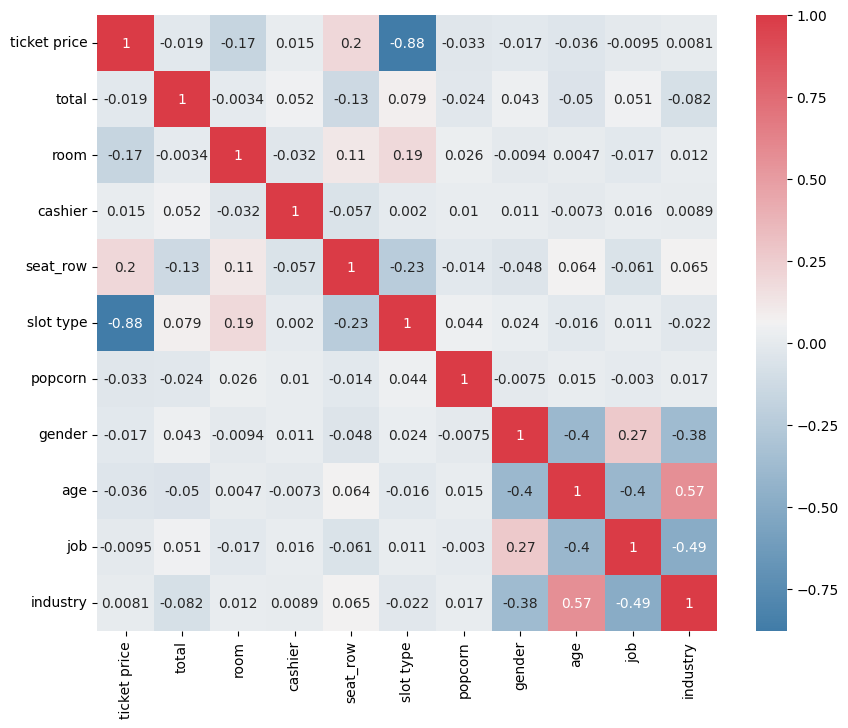

In [82]:
import datetime as dt

df_corr = df_tick.copy()
def extract_seatrow(data):
    return data[:1]

# extract seat_row
df_corr['seat_row'] = df_corr['slot'].apply(extract_seatrow)

df_merged = pd.merge(df_corr, df_cust, on=['customerid'], how='left')
df_merged = df_merged.dropna(subset='popcorn')

# extract age
def extract_age(birthday):
    today = datetime.now().year
    age = today - birthday.year
    return age
df_merged['age'] = df_merged['DOB'].apply(extract_age)

# encode categorical columns
list_columns_encode = ['cashier','seat_row','slot type','ticket type','popcorn','gender','job','industry']
    
from sklearn.preprocessing import LabelEncoder
for col in list_columns_encode:
    enc = LabelEncoder()
    df_merged[col] = enc.fit_transform(df_merged[col])

# calculate calculation
list_columns_corr = ['ticket price', 'total','room', 'cashier','seat_row','slot type','popcorn','gender','age', 'job','industry']

# pearson correlation
corr = df_merged[list_columns_corr].corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# plotting
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True, cmap=cmap)
plt.show()
# df_merged.head(10)

Nhóm biến liên quan đến nhân khẩu học như gender, age, job, industry tương quan lẫn nhau khá mạnh: Có khả năng phân cụm khách hàng.

Ticket price - Slot type:   
- Hệ số tương quan là -0,88, cho thấy mối liên hệ tương quan mạnh và nghịch đảo. Khi slot type là ghế đôi, ticket price có xu hướng tăng mạnh.

### **Film data**

In [83]:
data_url = 'https://github.com/anhvi02/ProjectCinema/raw/main/Data/DATA_SET_-_VONG_1_CUOC_THI_DATA_GOT_TALENT_2023.xlsx'
df_film = pd.read_excel(data_url, sheet_name='film')
df_film.head(3)

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description
0,s27,X-Men: Dark Phoenix,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...","United States, Canada",2019,PG-13,115 min,"Action-Adventure, Family, Science Fiction",When Jean Grey transforms into the Dark Phoeni...
1,s165,The Kid Who Would Be King,Joe Cornish,"Louis Ashbourne Serkis, Tom Taylor, Rebecca Fe...","United Kingdom, United States",2019,PG,121 min,"Action-Adventure, Coming of Age, Family","When a kid discovers the legendary sword, Exca..."
2,s194,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,2019,NaN,53 min,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...


**Khám phá dữ liệu**

In [84]:
# kiểm tra nếu cột show_id có giá trị lặp
df_film['show_id'].duplicated().sum()

0

In [85]:
def explore_data(dataframe):
    print('Data Shape: \n ', dataframe.shape, end=' \n \n ')
    print('Data Types: \n ', dataframe.dtypes, end=' \n \n ')
    # print('Data information: \n ',dataframe.info(), end=' \n \n ')
    print('Data total missing values: \n ', dataframe.isnull().sum(), end=' \n \n ')
    print('Data total duplicated values: \n ',dataframe.duplicated().sum(), end=' \n \n ')

explore_data(df_film)

Data Shape: 
  (60, 10) 
 
 Data Types: 
  show_id         object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object 
 
 Data total missing values: 
  show_id          0
title            0
director        10
cast             6
country          7
release_year     0
rating           1
duration         0
listed_in        0
description      0
dtype: int64 
 
 Data total duplicated values: 
  0 
 
 

**Xử lí giá trị thiếu:**  
- rating: fill giá trị mode

In [86]:
mode_value = df_film['rating'].mode().iloc[0]
print('Mode của cột rating:', mode_value)

# fill na cho cột rating
df_film['rating'].fillna(mode_value, inplace=True)

Mode của cột rating: TV-PG


**Chuyển đổi dữ liệu:**
- listed_in: chuyển đổi từ multi-value thành dummy value 
- country: chuyển đổi từ multi-value thành dummy value 
- duration: loại bỏ 'min' khỏi data và chuyển data từ dạng object thành int

In [87]:
# define các function phục vụ chuyển đổi multil-value column

# hàm tính toán số lượng unique value trong cột multi-value
def unique_cnt(series, seperator):
    unique_cnt = {}
    for ele in series:
        list_values = ele.split(seperator)
        # remove blank space 
        list_values = [item.replace(' ', '') for item in list_values]
        for typ in list_values:
            if typ not in unique_cnt:
                unique_cnt[typ] = 1
            else:
                unique_cnt[typ] += 1
    unique_cnt = sorted(unique_cnt.items(), key=lambda x: x[1], reverse=True)
    return unique_cnt


# hàm chuyển đổi từ multi-value column thành dummy-value columns
def multi_to_dummy(dataframe, column, pref=None, seperator=','):
    # convert into list type data
    split_col = dataframe[column].str.split(seperator)
    # get dummy and group
    df_dummy = pd.get_dummies(split_col.apply(pd.Series).stack(), prefix=pref).sum(level= 0)
    return df_dummy 

In [88]:
# số lượng unique value trong cột listed_in
unique_cnt(df_film['listed_in'], ',')

[('Family', 29),
 ('Documentary', 24),
 ('Action-Adventure', 21),
 ('Animation', 21),
 ('Comedy', 15),
 ('Historical', 9),
 ('Fantasy', 9),
 ('ComingofAge', 8),
 ('Animals&Nature', 6),
 ('ScienceFiction', 4),
 ('Superhero', 3),
 ('Biographical', 2),
 ('Music', 2),
 ('Drama', 2),
 ('Buddy', 2),
 ('Musical', 1),
 ('ConcertFilm', 1),
 ('Dance', 1)]

Vì số lượng unique value không quá lớn nên việc tách thành dummy value sẽ không sinh quá nhiều cột mới, do đó nhóm quyết định thực hiện tách thành dummy value

In [89]:
# dummy_data = multi_to_dummy(df_film,'listed_in', pref='genre', seperator=',')
# df_film = pd.concat([df_film, dummy_data], axis=1).drop(columns=['listed_in'])
# df_film.head(3)

In [90]:
# # tạm thời fill null cho cột country với "Unknown"
# df_film['country'].fillna("Unknown", inplace=True)
# # số lượng unique value trong cột country
# unique_cnt(df_film['country'], ',')

In [91]:
# dummy_data = multi_to_dummy(df_film,'country', pref='country', seperator=',')
# df_film = pd.concat([df_film, dummy_data], axis=1).drop(columns=['country', 'country_Unknown'])
# df_film.head(3)

In [92]:
# # loại bỏ 'min' khỏi cột duration và chuyển về datatype int
# df_film['duration'] = df_film['duration'].str.replace(' min', '').astype(int)
# df_film.head(3)

**Xuất dữ liệu**

In [93]:
# with pd.ExcelWriter('Cinematic.xlsx') as writer:
#     df_final_cust.to_excel(writer, sheet_name='Customer', index=False)
#     df_final_tick.to_excel(writer, sheet_name='Ticket', index=False)
#     df_film.to_excel(writer, sheet_name='Film', index=False)

## **Giai đoạn 2: Nạp dữ liệu**

**Login database**

In [94]:
# import pyodbc
# import streamlit as st
# import pandas as pd

# # Connection details
# server = 'datasquad.database.windows.net'
# database = 'db-cinema'
# username = 'datasquad.dn2024'
# password = 'Homies@2024'
# driver = '{ODBC Driver 18 for SQL Server}' 
# encoding = 'utf-8'

# # Connection string with character encoding specified
# conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password};CHARSET={encoding}'

# # Connect to the database
# conn = pyodbc.connect(conn_str)


In [95]:
# query_cust = 'SELECT * FROM Customer'
# df_cust = pd.read_sql(query_cust, conn)

# #Ticket Data
# query_tick = 'SELECT * FROM Ticket'
# df_tick = pd.read_sql(query_tick, conn)
# # df_tick = pd.merge(df_tick, df_cust, how='left', on='customerid')
# df_tick['showtime'] = pd.to_datetime(df_tick['showtime'])

# def extract_week(data):
#     data = data.isocalendar()[1]
#     return data
# df_tick['date'] = df_tick['showtime'].dt.date
# df_tick['hour'] = df_tick['showtime'].dt.hour
# df_tick['weekinyear'] = df_tick['showtime'].apply(extract_week)
# df_tick['dayinweek'] = df_tick['showtime'].dt.day_name()

**Cấu hình table database bao gồm 3 table:**
- Customer  
- Film  
- Ticker

In [96]:
# # Cursor
# cursor = conn.cursor()

# # SQL command to create Ticket table
# create_ticket_table = """
# CREATE TABLE Ticket (
#     orderid NVARCHAR(50),
#     cashier NVARCHAR(50),
#     saledate datetime NULL,
#     total int,
#     customerid NVARCHAR(50), 
#     ticketcode NVARCHAR(50),
#     slot NVARCHAR(50),
#     room tinyint,
#     film NVARCHAR(100),
#     slot_type NVARCHAR(50),
#     ticket_type NVARCHAR(50),
#     ticket_price int,
#     popcorn NVARCHAR(50) NULL,
#     showtime datetime,
# )
# """
# cursor.execute(create_ticket_table)

# # SQL command to create Customer table
# create_customer_table = """
# CREATE TABLE Customer (
#     customerid NVARCHAR(50) PRIMARY KEY,
#     DOB date NULL,
#     gender NVARCHAR(10) NULL,
#     Website NVARCHAR(50) NULL,
#     address NVARCHAR(MAX) NULL,
#     job NVARCHAR(50) NULL,
#     industry NVARCHAR(50) NULL,
# )
# """
# cursor.execute(create_customer_table)


# # SQL command to create Film table
# create_film_table = """
# CREATE TABLE Film (
#     show_id NVARCHAR(50) PRIMARY KEY,
#     title NVARCHAR(100),
#     director NVARCHAR(50) NULL,
#     cast NVARCHAR(200) NULL,
#     country NVARCHAR(50) NULL,
#     release_year int NULL,
#     rating NVARCHAR(50) NULL,
#     duration NVARCHAR(50) NULL,
#     listed_in NVARCHAR(50) NULL,
#     description NVARCHAR(200) NULL,
# )
# """
# cursor.execute(create_film_table)

# # SQL command to create contraints
# # customerid
# create_contraint_customerid = """
# ALTER TABLE Customer
#     ADD CONSTRAINT FK_Customer_Ticket
#     FOREIGN KEY (customerid) 
#     REFERENCES Ticket(customerid);
# """

# # film title
# create_contraint_filmtitle = """
# ALTER TABLE Film
#     ADD CONSTRAINT FK_Film_Ticket
#     FOREIGN KEY (title) 
#     REFERENCES Ticket(film);
# """
# # Commit the transaction
# conn.commit()

# # Close the connection
# # conn.close()

**Nạp dữ liệu sau khi được xử lý**

Bảng Customer

In [97]:
# # Cursor
# cursor = conn.cursor()

# insert_query = """
# INSERT INTO Customer (customerid, DOB, gender, address, Website, job, industry)
# VALUES (?, ?, ?, ?, ?, ?, ?)
# """

# # Iterate over rows in the DataFrame
# for index, row in df_cust.iterrows():
#     # Replace NaN values with None in the row
#     row = row.where(pd.notnull(row), None)
    
#     # Check if the customerid already exists in the table
#     cursor.execute("SELECT COUNT(*) FROM Customer WHERE customerid = ?", row['customerid'])
#     if cursor.fetchone()[0] > 0:
#         print(f"Customer id number: {row['customerid']} is already in the table")
#     else:
#         # Execute the insert query with parameters from the current row
#         cursor.execute(insert_query, tuple(row))
#         conn.commit()

Bảng Film

In [98]:
# # Cursor
# cursor = conn.cursor()

# insert_query = """
# INSERT INTO Film (show_id, title, director, cast, country, release_year, rating, duration, listed_in, description)
# VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
# """

# # Iterate over rows in the DataFrame
# for index, row in df_film.iterrows():
#     # Replace NaN values with None in the row
#     row = row.where(pd.notnull(row), None)
    
#     # Check if the film title already exists in the table
#     cursor.execute("SELECT COUNT(*) FROM Film WHERE title = ?", row['title'])
#     if cursor.fetchone()[0] > 0:
#         print(f"Film title: {row['title']} is already in the table")
#     else:
#         # Execute the insert query with parameters from the current row
#         cursor.execute(insert_query, tuple(row))
#         conn.commit()


Bảng Ticket

In [99]:
# # Cursor
# cursor = conn.cursor()

# insert_query = """
# INSERT INTO Ticket (orderid, cashier, saledate, total, customerid, ticketcode, slot, room, film, slot_type, ticket_type, ticket_price, popcorn, showtime)
# VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
# """

# # Iterate over rows in the DataFrame
# for index, row in df_tick.iterrows():
#     # Replace NaN values with None in the row
#     row = row.where(pd.notnull(row), None)
    
#     # Check if the ticket already exists in the table
#     cursor.execute("""
#         SELECT COUNT(*) 
#         FROM Ticket 
#         WHERE orderid = ? AND cashier = ? AND saledate = ? AND total = ? AND customerid = ? 
#         AND ticketcode = ? AND slot = ? AND room = ? AND film = ? AND slot_type = ? 
#         AND ticket_type = ? AND ticket_price = ? AND popcorn = ? AND showtime = ?
#     """, tuple(row))
    
#     if cursor.fetchone()[0] > 0:
#         print("Ticket already exists:", tuple(row))
#     else:
#         # Execute the insert query with parameters from the current row
#         cursor.execute(insert_query, tuple(row))
#         conn.commit()


In [100]:
# conn.close()

## **Giai đoạn 2: Phân tích dữ liệu**

### **Sale Analysis**

**Tổng doanh thu**

In [101]:
df_order = df_final_tick.drop_duplicates(subset=['orderid'])
df_order.head(3)

,orderid,cashier,saledate,total,customerid,ticketcode,slot,room,film,slot type,ticket type,ticket price,popcorn,showtime,date,hour,dayinweek,weekinyear
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000,0000000014,20074925,G04,3,AVENGERS: HỒI KẾT,ĐƠN,Thành viên,45000,Không,2019-05-06 18:15:00,2019-05-06,18,Monday,19
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000,0000000034,20097042,E04,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không,2019-05-22 20:45:00,2019-05-22,20,Wednesday,21
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000,0000000034,20106761,F04,1,NGÔI ĐỀN KỲ QUÁI (C18),ĐƠN,Thành viên,45000,Không,2019-05-30 19:30:00,2019-05-30,19,Thursday,22


In [102]:
total_sale = round(df_order['total'].sum())
print('Tổng doanh thu:', total_sale)
# df_tick['orderid'].duplicated().sum()

Tổng doanh thu: 1686815000


**Số lượng order**

In [103]:
print('Tổng số order:',len(df_order['orderid']))

Tổng số order: 14641


In [104]:
print('Tổng số vé:',len(df_tick['orderid']))

Tổng số vé: 35474


**Số lượng phim được chiếu**

In [105]:
len(df_order['film'].unique())

19

## **Phân tích doanh thu**

**Doanh thu theo ngày**

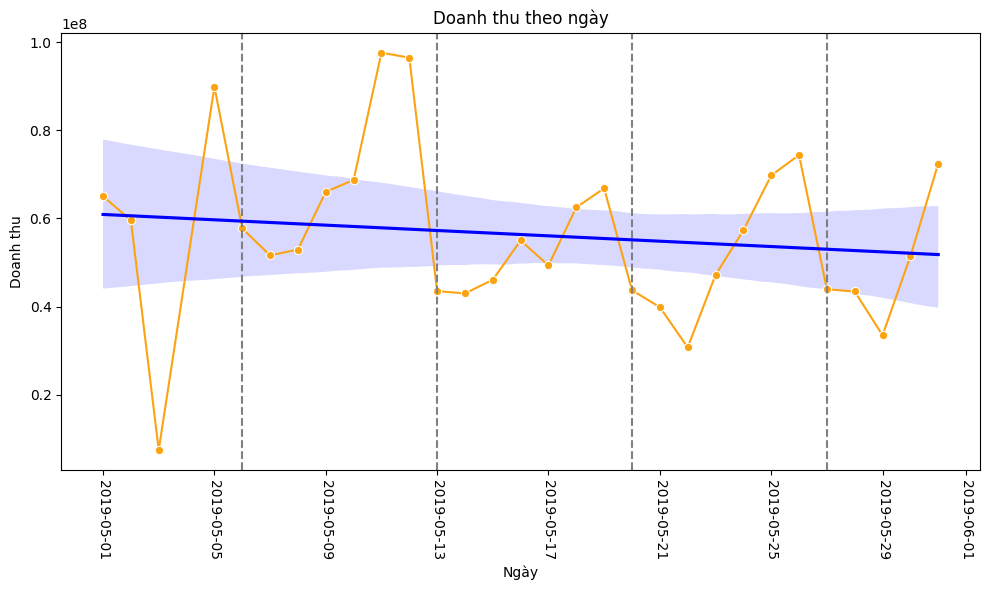

In [106]:
from matplotlib.dates import date2num
df_order = df_final_tick.drop_duplicates(subset=['orderid'])
#Tính tổng doanh thu theo ngày
df_order['saledate'] = pd.to_datetime(df_order['saledate'])
daily_revenue = df_order.groupby(df_order['saledate'].dt.date)['total'].sum().reset_index()
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_revenue, x='saledate', y='total', marker='o', color='#fca311')

# Chuyển giá trị của trục x thành ngày cụ thể
vertical_line_dates = [daily_revenue.iloc[4]['saledate'], daily_revenue.iloc[11]['saledate'],daily_revenue.iloc[18]['saledate'],daily_revenue.iloc[25]['saledate']]

# Vẽ đường thẳng đứng tại ngày cụ thể
for line in vertical_line_dates:
    plt.axvline(x=line, color='grey', linestyle='--', label='Vertical Line at day 5')
# Vẽ đường trend dựa trên dữ liệu
sns.regplot(x=date2num(daily_revenue['saledate']), y='total', data=daily_revenue, scatter_kws={'s': 0}, line_kws={'color': 'blue'}, label='Trend Line')
plt.title('Doanh thu theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.xticks(rotation = -90)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Xu hướng của Doanh thu giảm nhẹ từ đầu tháng đến cuối tháng 
- Biểu đồ trên có chu kỳ giảm nhẹ sau đó tăng mạnh đến khi đạt Doanh thu cao nhất sau đó lại giảm mạnh.
- Doanh thu cao nhất trong Tháng 5 tương ứng với ngày 10/05/2019 với Doanh thu sấp xỉ 100.000.00 VNĐ.
- Ngày 03/05/2019 với Doanh thu khá thấp ở ngưỡng dưới 20.000.000 VNĐ và ở ngày tiếp theo 04/05/2019 không ghi nhận được Doanh thu.

**Doanh thu của các thứ trong tuần**

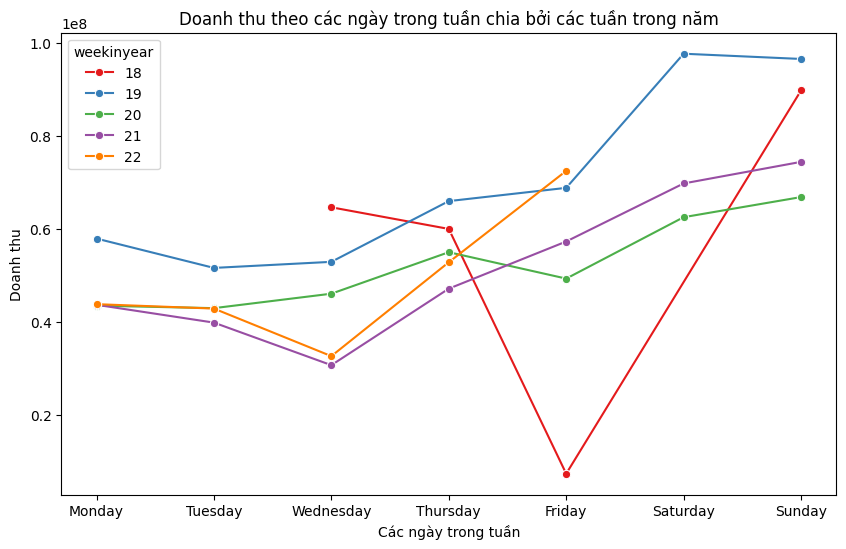

In [107]:
df_sale_time = df_order.copy()
df_sale_time['showtime'] = pd.to_datetime(df_sale_time['showtime'])

sale_by_dayinweek = pd.DataFrame(df_sale_time.groupby(['dayinweek','weekinyear'])['total'].sum()).reset_index()
# Mapping days of the week to numbers
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

sale_by_dayinweek['numbered_dayinweek']=sale_by_dayinweek['dayinweek'].map(day_mapping)
sale_by_dayinweek  = sale_by_dayinweek.sort_values(by='numbered_dayinweek')
sale_by_dayinweek.head(3)

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.lineplot(data=sale_by_dayinweek, x='dayinweek', y='total', hue='weekinyear', palette='Set1',marker='o')
plt.title('Doanh thu theo các ngày trong tuần chia bởi các tuần trong năm')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Doanh thu')
plt.show()

- *Nhận xét:*
    - Nhìn chung doanh thu có xu hướng tăng vào các ngày cuối tuần.
    - Doanh thu của các tuần giao động theo một hình mẫu chung. Hầu hết doanh thu của các tuần đều giảm nhẹ vào thứ Tư sau đó tăng mạnh cho tới Chủ Nhật.
    - Tuần có doanh thu cao nhất là tuần 19 trong xuyên suốt tháng 5.
    - Tuy nhiên vào thứ Sáu tuần 18 (3/5/2019) doanh thu giảm đột ngột và thứ 7 ngày 04/05/2019 không ghi nhận được Doanh thu..
        - Nguyên nhân có thể do rạp đóng cửa bảo trì hoặc có lỗi hệ thống trong việc lưu trữ dữ liệu
        - Để tránh sự bất ngờ cho khách hàng, thông báo trước về sự kiện đóng cửa là quan trọng. Rạp phim nên thông báo rõ ràng về thời gian đóng cửa 


**Doanh thu theo các giờ trong ngày**

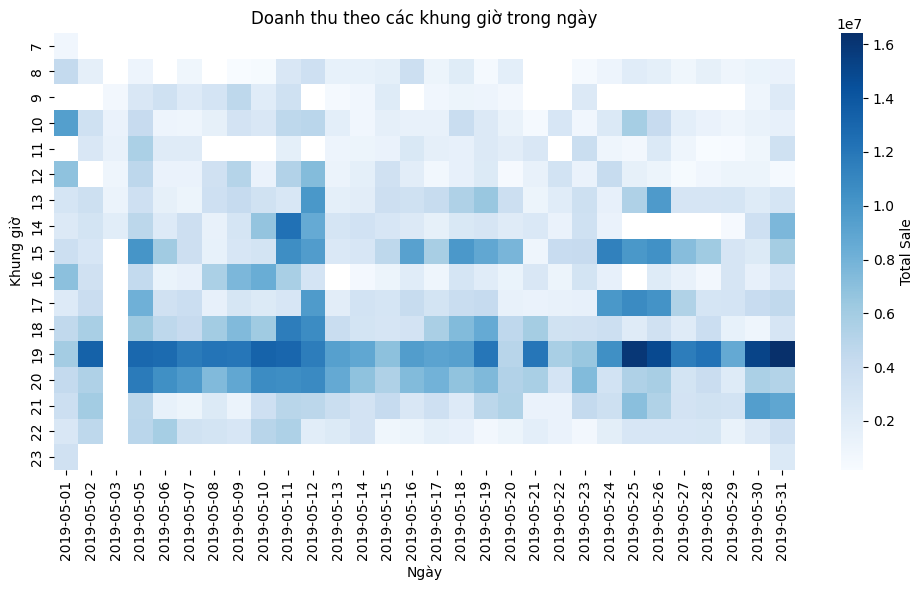

In [108]:
# Assuming your DataFrame is named 'df_sale_time' with columns 'showtime' and 'total'
# Convert 'showtime' to datetime format
df_sale_time = df_order.copy()
df_sale_time['showtime'] = pd.to_datetime(df_sale_time['showtime'])

# Create a pivot table
hourly_sales_pivot = df_sale_time.pivot_table(values='total', index='hour', columns='date', aggfunc='sum')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_sales_pivot, cmap='Blues', cbar_kws={'label': 'Total Sale'})

plt.title('Doanh thu theo các khung giờ trong ngày')
plt.xlabel('Ngày')
plt.ylabel('Khung giờ')
plt.tight_layout()

plt.show()

- *Nhận xét:*
    - Khung giờ 15h và 19h, 20h có doanh thu cao hơn hẳn so với những khung giờ khác trong ngày  
    - Doanh thu trong hai khoảng thời gian từ ngày 10-ngày 12 và từ ngày 24-ngày 26 cao đột biến  
        - Ngày 10/5 và 24/5 là thứ 6 bắt đầu chuỗi 3 ngày cuối tuần
        - Nguyên nhân có thể do có sự ra mắt của một số phim như:
            - POKÉMON: THÁM TỬ PIKACHU (C13) (ra mắt từ ngày 10)
            - NGÔI ĐỀN KỲ QUÁI (C18) (ra mắt từ ngày 24)
            - ALADDIN (PD) (G) (ra mắt từ ngày 24)  
    - Ngày 03/05/2019 Doanh thu chỉ được ghi nhận đến hết 14h00 và đến ngày 05/05/2019 Doanh thu được ghi nhận trở lại. 
        - Nguyên nhân:
            -	Rạp phim tạm đóng cửa để phục vụ công tác bảo trì, nâng cấp rạp.
            -	Dữ liệu có thể sẽ bị thất thoát vào những khung giờ và những ngày đó
    

**Trích xuất các film ra mắt vào những chuỗi ngày doanh thu cao**

In [109]:
print('Ngày ra mắt phim POKÉMON: THÁM TỬ PIKACHU (C13)')
df_sale_time['date']=pd.to_datetime(df_sale_time['date'])
print(df_sale_time[df_sale_time['film'] == 'POKÉMON: THÁM TỬ PIKACHU (C13)'].sort_values(by='date').head(1)['date'])
print()
print('Ngày ra mắt phim NGÔI ĐỀN KỲ QUÁI (C18)')
df_sale_time['date']=pd.to_datetime(df_sale_time['date'])
print(df_sale_time[df_sale_time['film'] == 'NGÔI ĐỀN KỲ QUÁI (C18)'].sort_values(by='date').head(1)['date'])
print()
print('Ngày ra mắt phim ALADDIN (PD) (G)')
df_sale_time['date']=pd.to_datetime(df_sale_time['date'])
print(df_sale_time[df_sale_time['film'] == 'ALADDIN (PD) (G)'].sort_values(by='date').head(1)['date'])

Ngày ra mắt phim POKÉMON: THÁM TỬ PIKACHU (C13)
46   2019-05-10
Name: date, dtype: datetime64[ns]

Ngày ra mắt phim NGÔI ĐỀN KỲ QUÁI (C18)
7412   2019-05-24
Name: date, dtype: datetime64[ns]

Ngày ra mắt phim ALADDIN (PD) (G)
7432   2019-05-24
Name: date, dtype: datetime64[ns]


**Doanh thu của phim trong tháng**

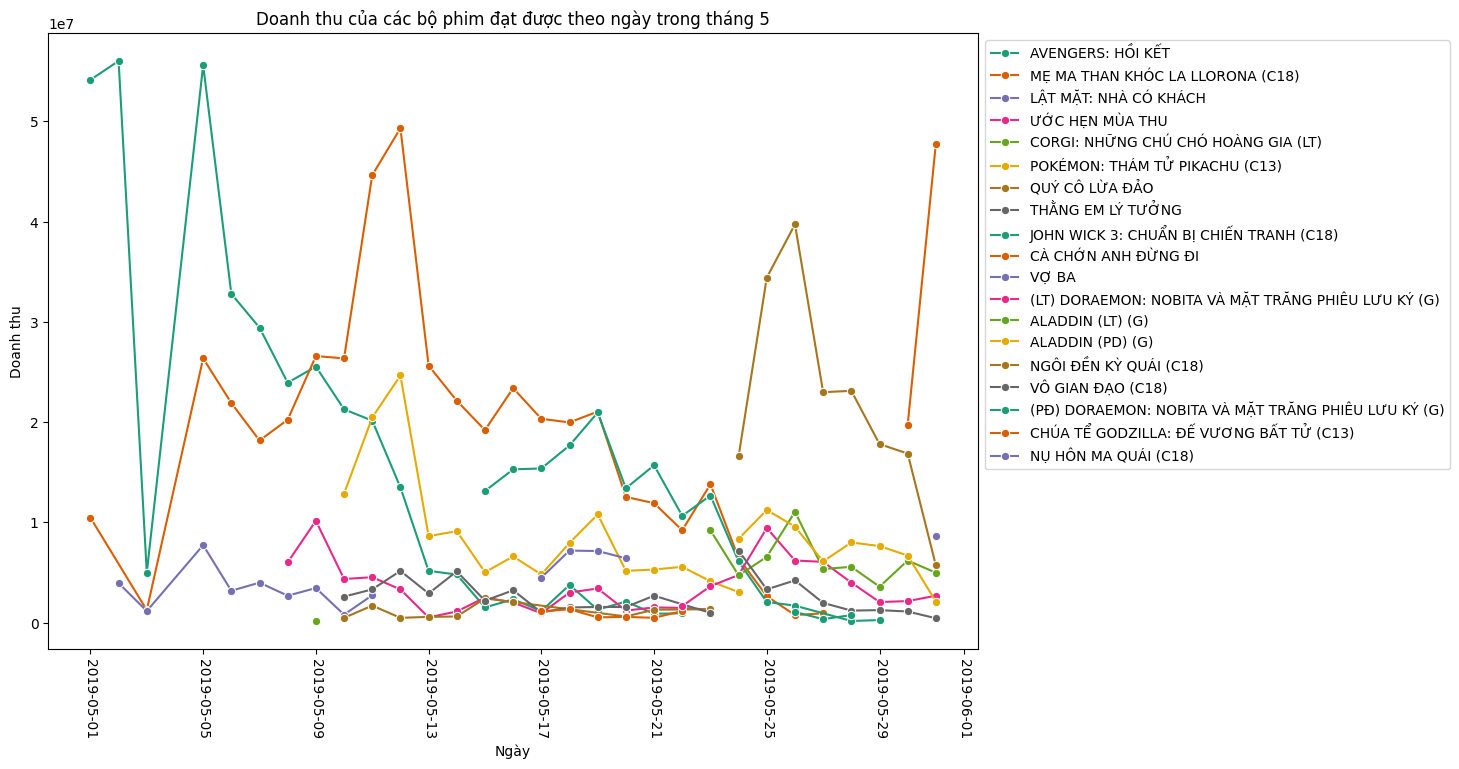

In [110]:
df_sale_film = df_order.copy()
df_sale_film['showtime'] = pd.to_datetime(df_sale_film['showtime'])

# Extract date and hour from 'showtime'
df_sale_film['date'] = df_sale_film['showtime'].dt.date
gr_sale_film = pd.DataFrame(df_sale_film.groupby(['date','film'])['total'].sum()).reset_index()

# Plot the line plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=gr_sale_film, x='date', y='total', hue='film', palette='Dark2', marker='o')
plt.title('Doanh thu của các bộ phim đạt được theo ngày trong tháng 5')
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.xticks(rotation = -90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Nhận xét:**
- Nhìn chung Doanh thu có xu hướng tăng vào những ngày đầu tiên phát hành phim, hầu hết đều tăng mạnh sau 3-5 ngày công chiếu và sau đó sẽ giảm dần đều.
- Bộ phim Doanh thu ở mức thấp là bộ phim “Quý cô lừa đảo” và “Cà nhớn anh đừng đi”.
- Bộ phim có Doanh thu cao là “Chúa tể Goozilla: Đế vương bất tử” và “Ngôi đền kỳ quái”.
- Ngày “09/05/2019” bộ phim “Corgi: Những chú chó hoàng gia” bắt đầu công chiếu những Doanh thu khá thấp và Doanh thu chỉ được ghi nhận trong ngày

**Xếp hạng doanh thu theo film**

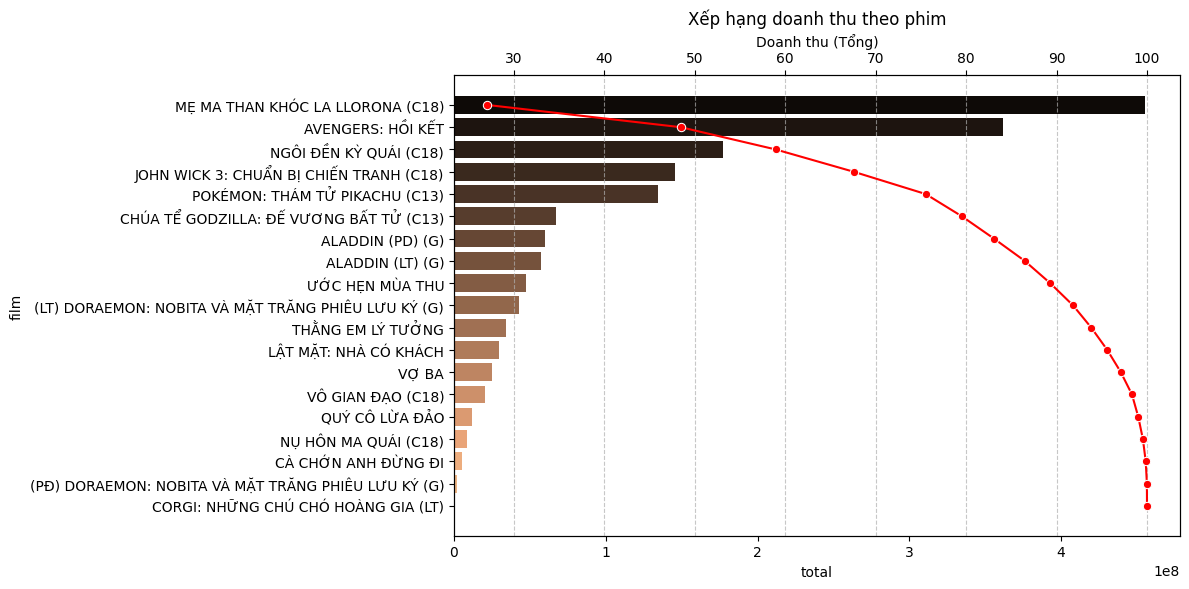

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_sale_cust = df_tick.drop_duplicates(subset=['orderid'])
df_sale_cust = pd.merge(df_sale_cust, df_cust, how='left', on='customerid')
df_sale_cust.head(3)

df_sale_cust = pd.DataFrame(df_sale_cust.groupby('film')['total'].sum()).reset_index().sort_values(by='total', ascending=False)

# # remove the 2 unsual customer
# df_sale_cust = df_sale_cust[2:]
# Calculate cumulative sum
df_sale_cust['cumulative_sum'] = df_sale_cust['total'].cumsum()

# Calculate total sum
total_sum = df_sale_cust['total'].sum()

# Calculate cumulative percentage
df_sale_cust['cumulative_percentage'] = (df_sale_cust['cumulative_sum'] / total_sum) * 100

# Your existing code

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1 = sns.barplot(data=df_sale_cust, y='film', x='total', palette='copper')  # Horizontal bar chart

ax2 = ax1.twiny()  # Creating a twin Axes sharing the y-axis
ax2 = sns.lineplot(data=df_sale_cust, x='cumulative_percentage', y='film', color='red', marker='o', linestyle='-')
plt.title('Xếp hạng doanh thu theo phim')
plt.xlabel('Doanh thu (Tổng)')
plt.ylabel('Khách hàng')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Nhận xét**
- 5 bộ phim: “Mẹ Ma Than Khóc Là Llorona”, “Avengers: Hồi Kết”, “Ngôi Đền Kỳ Quái”, “John Wick 3: Chuẩn bị chiến tranh”, “Pokemon: Thám tử Pikachu” chiếm 80% tổng Doanh thu của tất cả các bộ phim được chiếu trong Tháng 5. 
    - Nguyên nhân dẫn đến sự chênh lệch:
        - Loại phim: Đa số những bộ phim chiếm Doanh thu cao sẽ đến từ những thể loại phim kinh dị (Mẹ Ma Than Khóc Là Llorona, Ngôi Đền Kỳ Quái), những Series phim nổi tiếng và nhận được nhiều sự quan tâm (Avengers, John Wick 3).
        - Độ nổi tiếng của các diễn viên: Bộ phim Mẹ Ma Than Khóc La Llorona có sự tham gia của các diễn viên nổi tiếng như Linda Cardellini, Raymond Cruz, và Patricia Velasquez. Bộ phim Avengers: Hồi Kết có sự tham gia của các diễn viên nổi tiếng như Robert Downey Jr., Chris Evans, và Scarlett Johansson.
    - Đề xuất:
        - Những yếu tố trên cho thấy rằng rạp phim cần tập trung vào việc chiếu các bộ phim có khả năng thu hút nhiều khách hàng. Có thể tiếp tục và phát triển về những bộ phim về thể loại mà kháng giả ưa chuộng như kinh dị và những Series phim nổi tiếng. Ưu tiên lựa chọn những bộ phim có sự góp mặt của các diễn viên, đạo diễn nổi tiếng để thu hút khán giả.

**Phân tích khách hàng dựa trên số lần mua và tổng số tiền khách hàng đã chi**


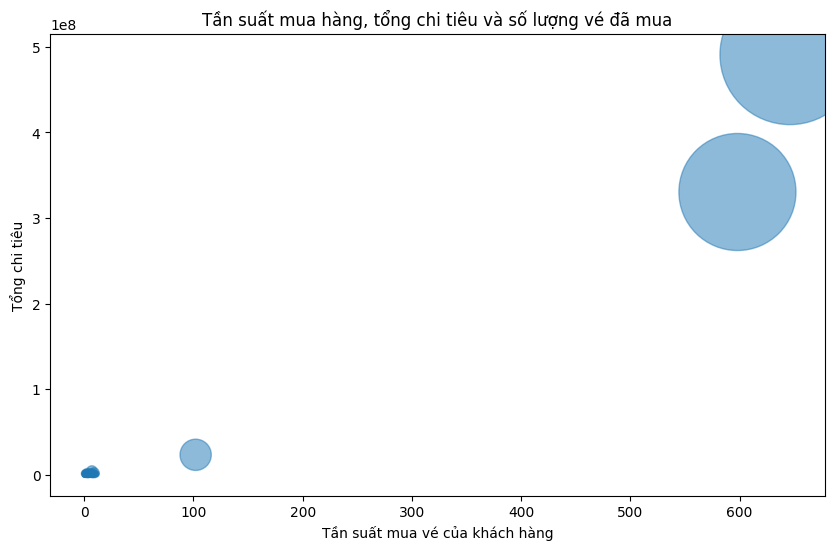

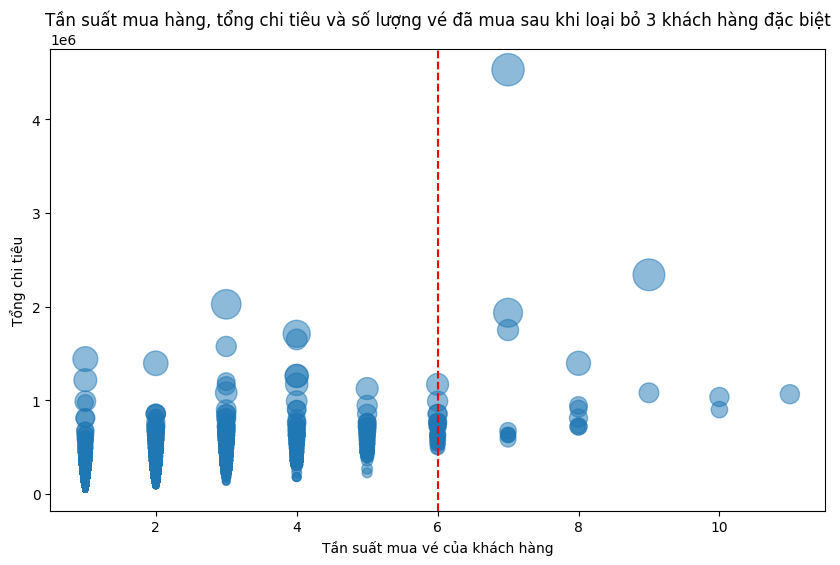

In [112]:
# Đếm tổng số vé 1 khách hàng đã mua
df_count_ticket = pd.DataFrame(df_tick['customerid'].value_counts()).reset_index()
##
df_sale_cust = df_tick.drop_duplicates(subset=['orderid'])
# # tính tổng tiền khách hàng đã chi theo suất chiếu
df_sale_cust = df_sale_cust.groupby(['customerid','showtime']).agg(total_price=('total', 'sum')).reset_index()
# Số lần xem phim, tổng tiền đã chi, tổng số vé đã mua
df_sale_cust = df_sale_cust.groupby('customerid').agg(total_price=('total_price', 'sum'),freq_cust=('customerid','count')).reset_index()
df_sale_cust= pd.merge(df_count_ticket, df_sale_cust, how='left', on='customerid')

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6)) 
plt.scatter(df_sale_cust['freq_cust'], df_sale_cust['total_price'],s=df_sale_cust['count'],alpha=0.5)

# Đặt tên trục và tiêu đề
plt.xlabel('Tần suất mua vé của khách hàng')
plt.ylabel('Tổng chi tiêu')
plt.title('Tần suất mua hàng, tổng chi tiêu và số lượng vé đã mua')

# Hiển thị biểu đồ
plt.show()

# Xóa các bản ghi có 'frequency_of_cust' lớn hơn 100
threshold_value = 100
df_sale_cust = df_sale_cust[df_sale_cust['freq_cust'] <= threshold_value]

# Vẽ biểu đồ scatter sau khi xóa
plt.figure(figsize=(10,6)) 
plt.scatter(df_sale_cust['freq_cust'], df_sale_cust['total_price'],s=df_sale_cust['count']*10,alpha=0.5)

# Đặt tên trục và tiêu đề
plt.xlabel('Tần suất mua vé của khách hàng')
plt.ylabel('Tổng chi tiêu')
plt.title('Tần suất mua hàng, tổng chi tiêu và số lượng vé đã mua sau khi loại bỏ 3 khách hàng đặc biệt')

vertical_lines = [6]  # vị trí các ticks để vẽ các đường thẳng (theo thứ tự)
for line in vertical_lines:
    plt.axvline(x=line, color='red', linestyle='--')

# Hiển thị biểu đồ
plt.show()

**Nhận xét biểu đồ 1:**
- Có 3 khách hàng có tần suất mua vé, Doanh thu mang lại cũng như số lượng vé đã mua rất cao. Vượt xa những khách hàng còn lại.
    - Đây là những khách hàng đặc biệt tiềm năng nhất và cần được chú trọng. 

**Nhận xét biểu đồ 2:**
- Phần lớn khách hàng quay trở lại dưới 6 lần trong 1 tháng.
    - Nguyên nhân:
        - Thời gian: có ít thời gian cho việc xem phim, giải trí.
        - Giá cả: giá cả không phù hợp, quá cao so với khả năng
        - Mức độ quan tâm: phim không đủ hấp dẫn để có sự quan tâm của khách hàng
    - Đề xuất: 
        - Cần có những chiến lược để làm hài lòng tệp khách hàng trên nhằm mục đích tối đa hóa doanh thu.
        - Chạy các chiến dịch marketing nhằm thu hút sự quan tâm của nhóm khách hàng trên
- Phần còn lại là những khách hàng thân thuộc đã xem phim hơn 6 lần 1 tháng
- Có 2 khách hàng đáng chú ý:
    - Chi tiêu cao , tần suất thấp
    - Chi tiêu thấp , tần suất cao
    - Đề xuất: 
        - Tạo chương trình thẻ thành viên với nhiều cấp độ khác nhau, tuy nhiên cân nhắc ở 2 yếu tố tổng chi tiêu và tần suất mua hàng.
        - Đưa ra các khuyến mãi khi đi với nhóm bạn, hoặc cặp đôi.

**Xếp hạng doanh thu theo khách hàng**

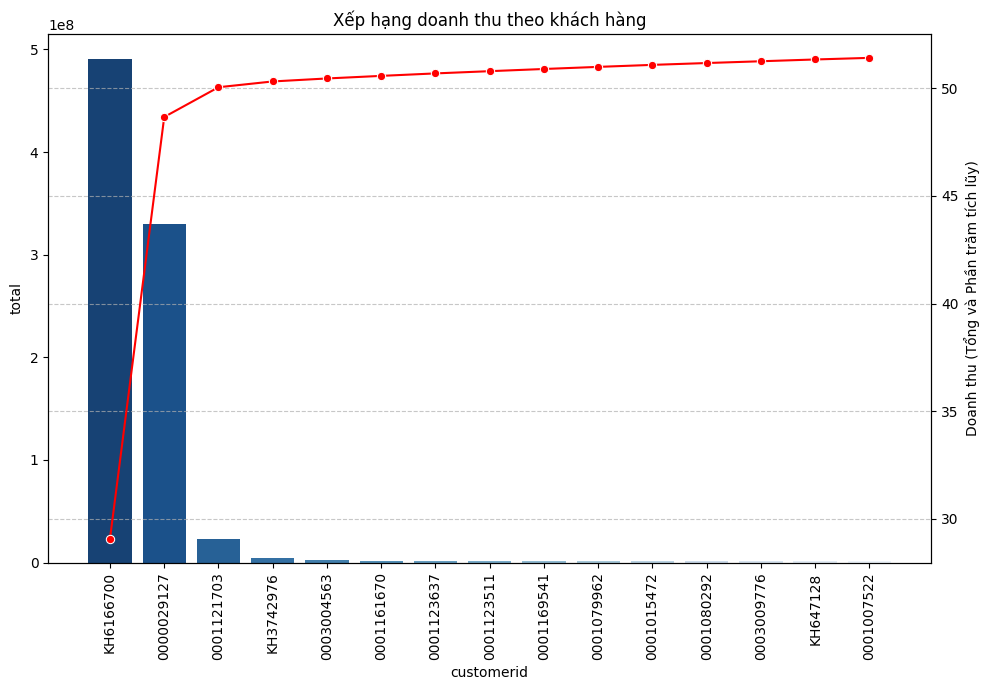

In [113]:
df_sale_cust = df_tick.drop_duplicates(subset=['orderid'])
df_sale_cust = pd.merge(df_sale_cust, df_cust, how='left', on='customerid')
df_sale_cust.head(3)

df_sale_cust = pd.DataFrame(df_sale_cust.groupby('customerid')['total'].sum()).reset_index().sort_values(by='total', ascending=False)

# # remove the 2 unsual customer
# df_sale_cust = df_sale_cust[2:]
# Calculate cumulative sum
df_sale_cust['cumulative_sum'] = df_sale_cust['total'].cumsum()

# Calculate total sum
total_sum = df_sale_cust['total'].sum()

# Calculate cumulative percentage
df_sale_cust['cumulative_percentage'] = (df_sale_cust['cumulative_sum'] / total_sum) * 100

# Select top
df_sale_cust = df_sale_cust.head(15)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1 = sns.barplot(data=df_sale_cust, x='customerid', y='total', palette='Blues_r')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_sale_cust, x='customerid', y='cumulative_percentage', color='red', marker='o', linestyle='-')
plt.title('Xếp hạng doanh thu theo khách hàng')
plt.xlabel('khách hàng')
plt.ylabel('Doanh thu (Tổng và Phần trăm tích lũy)')
# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Ba khách hàng có ID là “KH6166700”, “0000029127” và”000121703” đóng góp 50% tổng Doanh thu của rạp phim trong Tháng 5.
    - Nguyên nhân:
        - Có thể họ là những nhà đầu tư, những người mua vé xem phim với số lượng lớn để tặng cho khách hàng hoặc người thân.
        - Hoặc họ cũng có thể là những người tổ chức các sự kiện xem phim, chẳng hạn như các buổi chiếu phim doanh nghiệp hoặc các buổi chiếu phim cho các tổ chức phi lợi nhuận.
    - Đề xuất:
        - Xác định danh tính rõ ràng của hai khách hàng này để tìm hiểu thêm về họ và chính xác nhu cầu của họ.

Xếp hạng doanh thu theo nghề nghiệp

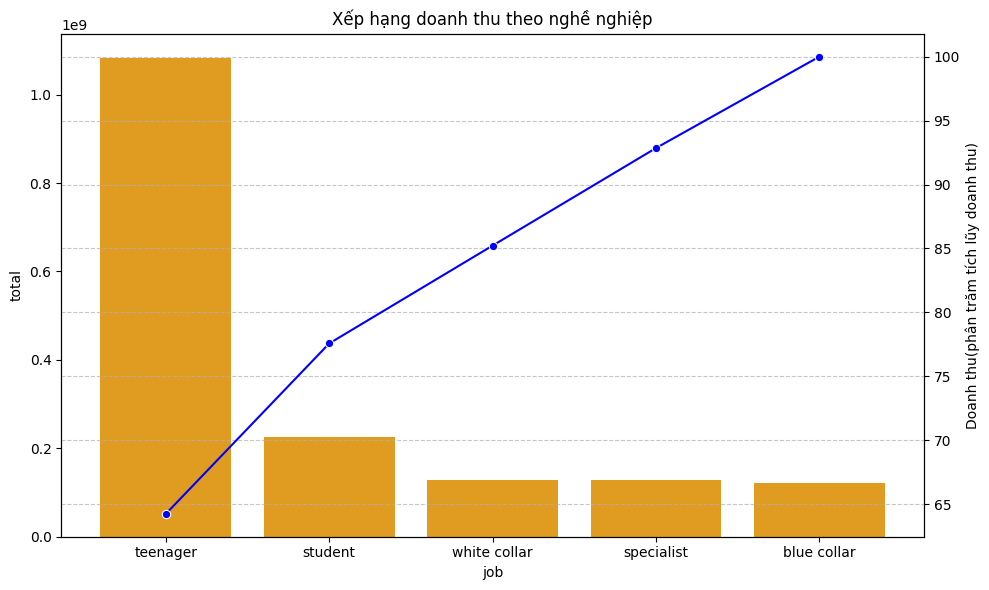

In [114]:
df_sale_job = df_final_tick.drop_duplicates(subset=['orderid'])
df_sale_job = pd.merge(df_sale_job, df_final_cust, how='left', on='customerid')
df_sale_job.head(3)

df_sale_job = pd.DataFrame(df_sale_job.groupby('job')['total'].sum()).reset_index().sort_values(by='total', ascending=False)

# # remove the 2 unsual customer
# df_sale_job = df_sale_job[2:]
# Calculate cumulative sum
df_sale_job['cumulative_sum'] = df_sale_job['total'].cumsum()

# Calculate total sum
total_sum = df_sale_job['total'].sum()

# Calculate cumulative percentage
df_sale_job['cumulative_percentage'] = (df_sale_job['cumulative_sum'] / total_sum) * 100

# Select top
df_sale_job = df_sale_job.head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1 = sns.barplot(data=df_sale_job, x='job', y='total', color='orange')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_sale_job, x='job', y='cumulative_percentage', color='blue', marker='o', linestyle='-')
plt.title('Xếp hạng doanh thu theo nghề nghiệp')
plt.xlabel('Nghề')
plt.ylabel('Doanh thu(phân trăm tích lũy doanh thu)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Khách hàng ở lứa tuổi thanh thiếu niên và học sinh mang lại sấp sỉ 80% tổng Doanh thu của rạp phim, chiếm tỷ lệ cao gấp nhiều lần so với số khách hàng còn lại của rạp phim.
    - Nguyên nhân:
        - Thời gian rảnh: Thanh thiếu niên và học sinh sẽ có nhiều thời gian hơn những nhóm khác, do đó việc họ đi xem phim nhiều hơn những nhóm khách hàng khác là điều dễ hiểu.
        - Sở thích: Thanh thiếu niên và học sinh này thường thích xem phim hơn các nhóm công việc khác. Điều này dẫn đến việc đi xem phim thường xuyên hơn.
    - Đề xuất:
        - Cần tập trung vào việc giữ chân nhóm khách hàng này và đồng thời cũng nên có những chiến lược để có thể thu hút nhóm khách hàng còn lại.
            - Triển khai những chương trình khuyến mãi dành cho Học sinh, Sinh viên như giảm giá vé hoặc tặng thêm Snack. Ngoài ra còn có thể tổ chức các sự kiện, hoạt động dành riêng cho Học sinh, Sinh viên như giảm giá xuất chiếu đêm dành cho nhóm khách hàng này,...
            - Đối với nhóm khách hàng còn lại chẳng hạn như giữ nguyên giá vé vào cuối tuần, tặng thêm đồ ăn vặt hoặc đồ lưu niệm để họ cảm thấy thu hút.

#### **Phân tích khách hàng**

**Chân dung khách hàng**

In [115]:
df_cust_copy = df_cust.copy()

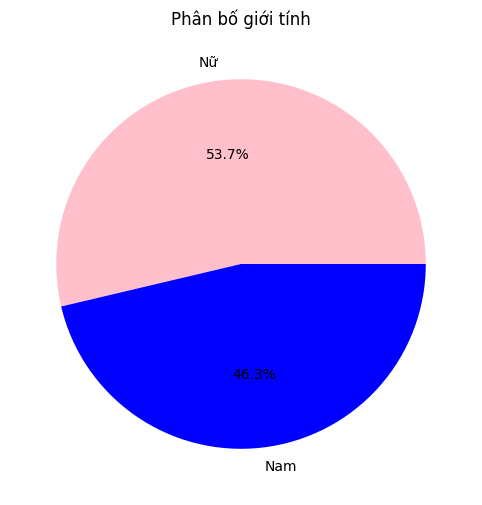

In [116]:
gender_ratio = pd.DataFrame((df_cust_copy['gender'].value_counts()/len(df_cust_copy))*100).reset_index(False)
plt.figure(figsize=(10,6)) 
plt.pie(gender_ratio['count'], labels=gender_ratio['gender'], autopct='%1.1f%%', colors=['pink','blue'])
# Đặt tên tiêu đề
plt.title('Phân bố giới tính')
plt.show()

- Khách hàng 53,7% nữ và 46,3% nam

**Vẽ biểu đồ phân bố tuổi**

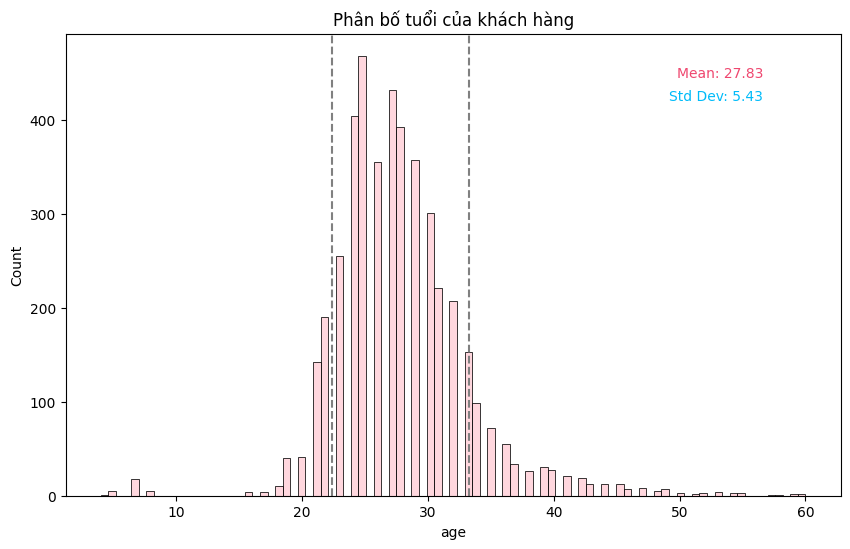

In [117]:
df_cust_copy = df_final_cust.sort_values(by='age')
# Tính độ lệch chuẩn
age = df_cust_copy['age'].dropna()
std_dev = np.std(age)
mean = np.mean(age)
# plot age histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_cust_copy, x='age', color='#ffcad4')
plt.title('Phân bố tuổi của khách hàng')

vertical_lines = [mean-std_dev,mean+std_dev]  # vị trí các ticks để vẽ các đường thẳng (theo thứ tự)
for line in vertical_lines:
    plt.axvline(x=line, color='grey', linestyle='--')
    

# Thêm thông tin về độ lệch chuẩn và trung bình lên biểu đồ
plt.text(0.9, 0.9, f'Mean: {mean:.2f}', ha='right', va='bottom', color='#ef476f', transform=ax.transAxes)
plt.text(0.9, 0.85, f'Std Dev: {std_dev:.2f}', ha='right', va='bottom', color='#00bbf9', transform=ax.transAxes)

plt.show()

**Nhận xét:**
- Độ tuổi của khách hàng trải dài từ 5 đến 60 tuổi
- Từ 23 đến 33 tuổi là khoảng tập trung khách hàng nhiều nhất
- Độ tuổi đến rạp phim nhiều nhất vào tháng năm là 27 tuổi
    - Đề xuất:
        - Nhóm khách hàng từ 23 – 33 tuổi nên được ưu tiên trong các chiến lược Marketing của rạp
        - Để mở rộng đối tượng khách hàng:. Chiếu phim hoạt hình, tổ chức các buổi chiếu phim kèm ưu đãi cho nhóm gia đình, hay các hoạt động vui chơi giải trí liên quan sẽ thu hút sự quan tâm của các bậc phụ huynh và trẻ em, từ đó gia tăng lượng khách hàng ở các độ tuổi dưới 20 và trên 50.

**Phân cụm khách hàng**

Số lượng record trước khi loại bỏ outlier 4479
Số lượng record sau khi loại bỏ outlier 4470


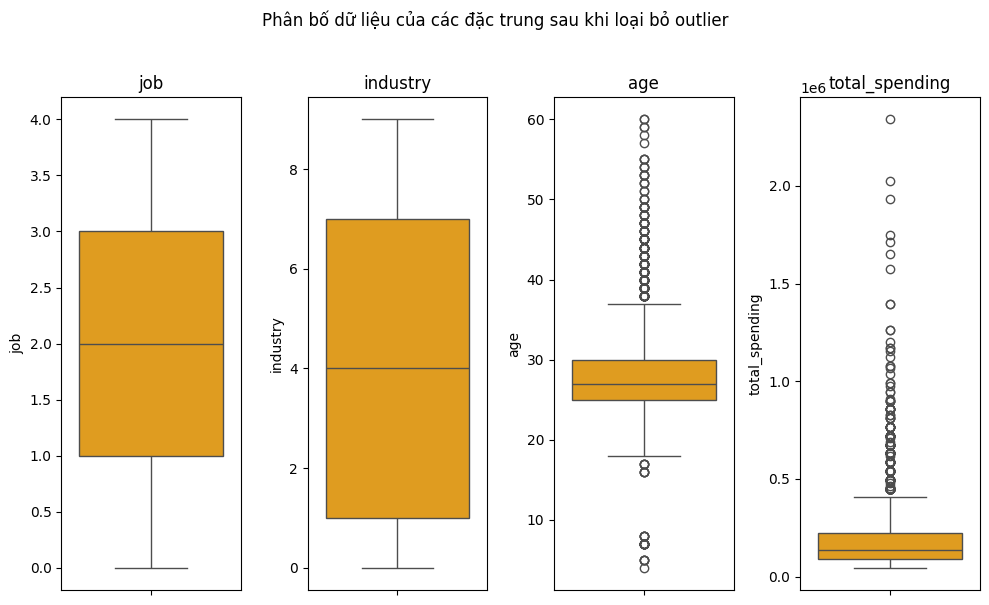

In [118]:
df_cluster = df_cust.copy()

# extract age
def extract_age(birthday):
    today = datetime.now().year
    age = today - birthday.year
    return age
df_cluster['age'] = df_cluster['DOB'].apply(extract_age)

# remove some columns
df_cluster = df_cluster.drop(columns=['Website','address','DOB'])

# remvove null
df_cluster = df_cluster.dropna()

# LabelEncoding
# list of categorical columns
list_categorical = ['gender', 'job', 'industry']
encoding_mappings = {}
for col in list_categorical:
    enc = LabelEncoder()
    df_cluster[col] = enc.fit_transform(df_cluster[col])
    encoding_mappings[col] = {index: label for label, index in enumerate(enc.classes_)}
# update encoding_mapping dictionary for decoding
for feature in encoding_mappings:
    encoding_mappings[feature] = {value: key for key, value in encoding_mappings[feature].items()}
encoding_mappings

# calculate spending
df_order = df_tick.drop_duplicates(subset=['orderid'])
# get total spending by customer
df_total_spending = pd.DataFrame(df_order.groupby('customerid')['total'].sum()).reset_index().rename(columns={'total':'total_spending'})
df_cluster = pd.merge(df_cluster, df_total_spending, how='left', on='customerid')
# get average spending by customer
df_average_spending = pd.DataFrame(df_order.groupby('customerid')['total'].mean()).reset_index().rename(columns={'total':'average_spending'})
df_cluster = pd.merge(df_cluster, df_average_spending, how='left', on='customerid')

# get number of transaction
df_freq = pd.DataFrame(df_order.drop_duplicates(subset=['customerid', 'showtime'])['customerid'].value_counts()).reset_index().rename(columns={'count':'number_of_transaction','index': 'customerid'})
df_cluster = pd.merge(df_cluster, df_freq, how='left', on='customerid')

# remove customerid
df_cluster = df_cluster.drop(columns='customerid')
print('Số lượng record trước khi loại bỏ outlier', len(df_cluster))
# remove outliers
df_cluster = df_cluster[(df_cluster['total_spending']<3e6) & (df_cluster['average_spending']<0.8e6)& (df_cluster['number_of_transaction']<20)]
#  
# df_cluster.to_csv('customer_cluster_2.csv', index=False)
print('Số lượng record sau khi loại bỏ outlier', len(df_cluster))
list_columns = ['job', 'industry', 'age', 'total_spending']
fig, axs = plt.subplots(1, 4, figsize=(10, 6))
axs = axs.ravel()

for ind, col in enumerate(df_cluster[list_columns].columns):
    sns.boxplot(data=df_cluster, y=col, ax=axs[ind], color='orange')
    axs[ind].set_title(col)
    axs[ind].set_ylabel(col)  # Set y-axis label
    axs[ind].set_xlabel('')  # Optionally remove x-axis label

fig.suptitle('Phân bố dữ liệu của các đặc trung sau khi loại bỏ outlier', y=1)
plt.tight_layout()
plt.show()

**Lựa chọn K, số cụm khách hàng phù hợp với Elbow Method**


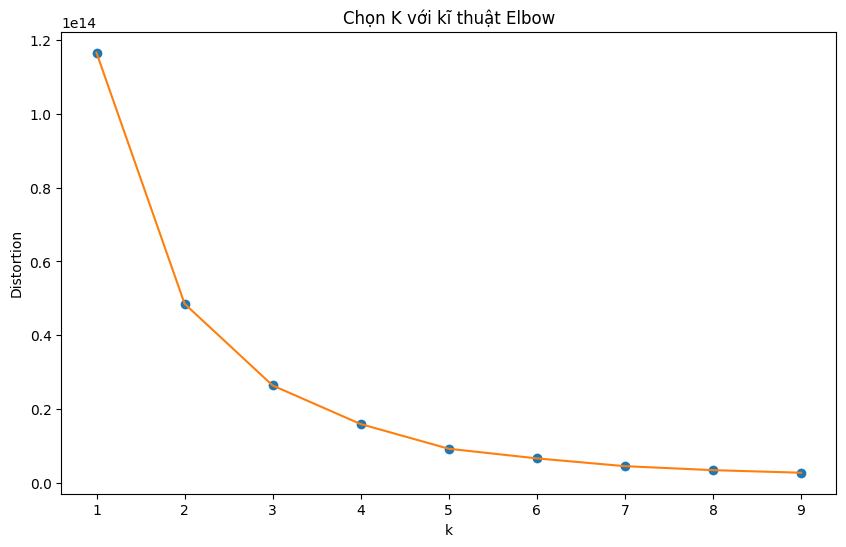

In [119]:
from sklearn.cluster import KMeans

# Choosing K with the elbow method
# Select features for clustering
list_columns_cluster = ['gender', 'job', 'industry', 'age', 'total_spending']
# , 'average_spending' , 'number_of_transaction'
X = df_cluster[list_columns_cluster]

K = range(1, 10)
distortions = []
for k in K:
    model = KMeans(n_clusters=k, init='k-means++', n_init=15, max_iter=350, random_state=42)
    model.fit(X)
    distortions.append(model.inertia_)

# Visualize result
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'o')
plt.plot(K, distortions, '-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Chọn K với kĩ thuật Elbow')
plt.show()

In [120]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Select features for clustering
list_columns_cluster = ['gender', 'job', 'industry', 'age', 'total_spending']
# , 'average_spending' , 'number_of_transaction'
X = df_cluster[list_columns_cluster]

# Scale data
scaler = MinMaxScaler()
X_encoded = scaler.fit_transform(X)

# Assuming you've chosen K based on the elbow method
chosen_k = 3  # Adjust this based on your elbow plot
# Train the KMeans model with the chosen K
model = KMeans(n_clusters=chosen_k, init='k-means++', n_init=15, max_iter=350, random_state=42)
model.fit(X_encoded)

# centroids = pd.DataFrame(model.cluster_centers_, columns=list_columns_cluster).transpose()

# Inverse transform the centroids with MinMaxScaler
centroids_original = scaler.inverse_transform(model.cluster_centers_)

# Create a DataFrame with the original centroids
centroids_df = pd.DataFrame(centroids_original, columns=list_columns_cluster).transpose()
centroids_df = round(centroids_df).astype(int)

# decoding
decode_columns = ['gender','job','industry']
for col in decode_columns:
    centroids_df.loc[col,:] = centroids_df.loc[col,:].map(encoding_mappings[col])
centroids_df

,0,1,2
gender,Nam,Nữ,Nữ
job,student,teenager,specialist
industry,education,computer,finance
age,28,25,30
total_spending,184290,200092,176135


Dựa trên trung bình tổng chi tiêu  trong tháng, chúng ta có thể xác định được chân dung của nhóm khách hàng quan trọng nhất:
- Trung bình tổng chi tiêu: 200.000 VNĐ 
- Giới tính: nữ
- Độ tuổi: 25
- Nghề nghiệp: tuổi vị thành niên
- Lĩnh vực hoạt động: máy tính, công nghệ thông tin

Đề xuất
- Khuyến mãi Đích đáng: Phát triển các chiến dịch marketing và khuyến mãi được tùy chỉnh dành riêng cho các khách hàng nữ trẻ tuổi khoảng 25 tuổi quan tâm đến công nghệ và máy tính. Cung cấp giảm giá, các buổi chiếu đặc biệt hoặc các chương trình thân thiết để khích lệ họ đến rạp chiếu phim thường xuyên hơn.

- Đối tác với Các Thương hiệu Công nghệ: Hợp tác với các thương hiệu công nghệ hoặc các công ty trong lĩnh vực CNTT để cung cấp các ưu đãi độc quyền hoặc các chương trình khuyến mãi chung nhắm vào nhóm khách hàng này. Điều này có thể bao gồm các chương trình quảng cáo chéo, các sự kiện có cùng thương hiệu hoặc các buổi chiếu đặc biệt với chủ đề công nghệ.

- Gợi ý Cá nhân hóa: Triển khai hệ thống gợi ý cá nhân hóa để đề xuất các bộ phim phù hợp với sở thích của nhóm khách hàng này, đặc biệt là tập trung vào các thể loại phim phổ biến trong cộng đồng yêu công nghệ.

- Mạng lưới Trực tuyến Cải thiện: Đầu tư vào các chiến lược marketing số để tiếp cận khán giả nữ trẻ tuổi trực tuyến. Sử dụng các nền tảng truyền thông xã hội, hợp tác với các influencer và quảng cáo trực tuyến được tùy chỉnh để nâng cao nhận thức về các bộ phim sắp tới và các chương trình khuyến mãi.

